In [33]:
import pandas as pd
import polars as pl

In [34]:
df_tito_corrected_pos = pl.scan_csv(
    "data/pos/tito_mzbatch_corrected_quant_full.csv"
).collect()

In [35]:
pos_mol = df_tito_corrected_pos["compound_db_identity:compound_name"].unique()

In [36]:
df_tito_corrected_neg = pl.scan_csv(
    "data/neg/tito_mzbatch_corrected_quant_full.csv"
).collect()

In [37]:
neg_mol = df_tito_corrected_neg["compound_db_identity:compound_name"].unique()

In [38]:
targets = pl.scan_csv("plate_3_targets.csv").collect()

In [39]:
targets

name,neutral mass,formula,rt,pubchem_id,smiles
str,f64,str,i64,i64,str
"""Abscisic Acid (Dormin)""",264.136159,"""C15H20O4""",0,287291,"""CC(C=CC1(O)C(C)=CC(=O)CC1(C)C)…"
"""(-)-epicatechin""",290.079038,"""C15H14O6""",0,72276,"""Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)…"
"""(-)-epicatechin gallate""",442.089997,"""C22H18O10""",0,107905,"""O=C(OC1Cc2c(O)cc(O)cc2OC1c1ccc…"
"""Picrotoxin_0""",292.094688,"""C15H16O6""",0,31306,"""C=C(C)C1C2OC(=O)C1C1(O)CC3OC34…"
"""Picrotoxin_1""",310.105253,"""C15H18O7""",0,3032291,"""CC(C)(O)C1C2OC(=O)C1C1(O)CC3OC…"
…,…,…,…,…,…
"""Mulberroside A""",568.179206,"""C26H32O14""",0,6443484,"""OCC1OC(Oc2cc(O)cc(C=Cc3ccc(OC4…"
"""Dehydrodiisoeugenol""",326.151809,"""C20H22O4""",0,5379033,"""CC=Cc1cc(OC)c2c(c1)C(C)C(c1ccc…"
"""Hydroxysafflor yellow A""",612.169035,"""C27H32O16""",0,75296842,"""O=C(C=Cc1ccc(O)cc1)C1C(=O)C(C2…"


In [40]:
results = pl.DataFrame(
    {
        "name": targets["name"].to_list(),
        "detected_pos": targets["name"].is_in(pos_mol).to_list(),
        "detected_neg": targets["name"].is_in(neg_mol).to_list(),
    }
).sort("name")

results.write_csv("plate_3_targets_detected.csv")

/var/folders/ll/v9q3qnpx27d8g0shfnvjnslrfgd6wf/T/ipykernel_35650/3694730745.py:4: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  "detected_pos": targets["name"].is_in(pos_mol).to_list(),
/var/folders/ll/v9q3qnpx27d8g0shfnvjnslrfgd6wf/T/ipykernel_35650/3694730745.py:5: DeprecationWarning: `is_in` with a collection of the same datatype is ambiguous and deprecated.
Please use `implode` to return to previous behavior.

See https://github.com/pola-rs/polars/issues/22149 for more information.
  "detected_neg": targets["name"].is_in(neg_mol).to_list(),


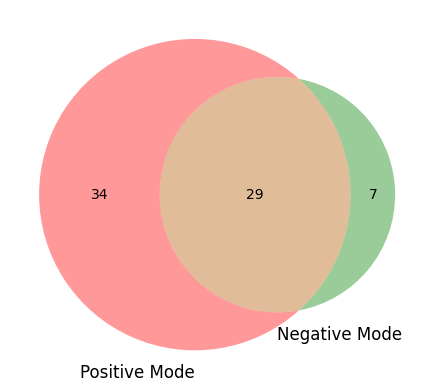

In [41]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Convert polars.Series to Python sets for intersection
pos_set = set(pos_mol.to_list())
neg_set = set(neg_mol.to_list())
combinations = len(pos_set & neg_set)

venn2(
    subsets=(
        len(pos_set) - combinations,
        len(neg_set) - combinations,
        len(pos_set & neg_set),
    ),
    set_labels=("Positive Mode", "Negative Mode"),
)
plt.show()

In [42]:
results.filter(pl.col("detected_pos") == True, pl.col("detected_neg") == True)

name,detected_pos,detected_neg
str,bool,bool
"""7,8-Dihydroxyflavone""",true,true
"""Abscisic Acid (Dormin)""",true,true
"""Alibiflorin""",true,true
"""Asiatic acid""",true,true
"""Asperosaponin Ⅵ""",true,true
…,…,…
"""Sec-O-Glucosylhamaudol""",true,true
"""Syringin""",true,true
"""Troxerutin""",true,true


In [43]:
df_tito_corrected_neg

id,rt,rt_range:min,rt_range:max,mz,mz_range:min,mz_range:max,height,area,intensity_range:min,intensity_range:max,fragment_scans,charge,compound_db_identity:compound_db_identity,compound_db_identity:compound_name,compound_db_identity:compound_annotation_score,compound_db_identity:mol_formula,compound_db_identity:adduct,compound_db_identity:smiles,compound_db_identity:precursor_mz,compound_db_identity:mz_diff_ppm,compound_db_identity:mz_diff,compound_db_identity:neutral_mass,compound_db_identity:isotope_pattern_score,compound_db_identity:database_name,alignment_scores:rate,alignment_scores:aligned_features_n,alignment_scores:align_extra_features,alignment_scores:weighted_distance_score,alignment_scores:mz_diff_ppm,alignment_scores:mz_diff,alignment_scores:rt_absolute_error,alignment_scores:ion_mobility_absolute_error,feature_group,ion_identities:iin_id,ion_identities:ion_identities,ion_identities:list_size,ion_identities:neutral_mass,ion_identities:partner_row_ids,ion_identities:iin_relationship,ion_identities:consensus_formulas,ion_identities:simple_formulas,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:feature_state,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:mz,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:mz_range:min,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:mz_range:max,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:rt,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:rt_range:min,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:rt_range:max,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:height,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:area,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:intensity_range:min,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:intensity_range:max,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:fwhm,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:tailing_factor,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:asymmetry_factor,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:fragment_scans,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:rt_ms2_apex_distance,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:isotopes,datafile:202505131015_CVOL_CVOL_Jade_QC_neg_10micro.mzML:charge
i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,f64,str,str,str,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,f64,i64,i64
136,0.435,0.41,0.6715,341.10909,341.10873,341.10983,2.894e6,138300.0,51740.0,2.894e6,0,1,"""Cellobiose: [M-H]-: 0.954""","""Cellobiose""",0.954,"""C12H22O11""","""[M-H]-""","""OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(…",341.10894,0.46,0.00016,342.11621,0.797,"""plate_3_targets.csv""",1,1,0,1,0,0,0,0,2,0,"""[M-H]-""",3,342.11629,"""136;154;137""",null,null,null,"""DETECTED""",341.10909,341.10873,341.10983,0.435,0.41,0.6715,2.894e6,138300.0,51740.0,2.894e6,0.0329,3.264,2.979,null,null,3,1
137,0.435,0.41,0.688,387.11444,387.11417,387.1152,1.687e7,760200.0,122200.0,1.687e7,1,1,"""Cellobiose: [M+FA]-: 0.994""","""Cellobiose""",0.994,"""C12H22O11""","""[M+FA]-""","""OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(…",387.11441,0.06,0.00002,342.11621,0.852,"""plate_3_targets.csv""",1,1,0,1,0,0,0,0,2,0,"""[M+FA]-""",3,342.11629,"""136;154;137""",null,null,null,"""DETECTED""",387.11444,387.11417,387.1152,0.435,0.41,0.688,1.687e7,760200.0,122200.0,1.687e7,0.0316,3.8609,2.3176,1,-0.0031,5,1
154,0.4431,0.41,0.6797,377.08566,377.08545,377.08606,1.675e7,1.083e6,160400.0,1.675e7,4,1,"""Cellobiose: [M+Cl]-: 0.988""","""Cellobiose""",0.988,"""C12H22O11""","""[M+Cl]-""","""OCC1OC(OC2C(CO)OC(O)C(O)C2O)C(…",377.08561,0.12,0.00004,342.11621,0.865,"""plate_3_targets.csv""",1,1,0,1,0,0,0,0,2,0,"""[M+Cl]-""",3,342.11629,"""136;154;137""",null,null,null,"""DETECTED""",377.08566,377.08545,377.08606,0.4431,0.41,0.6797,1.675e7,1.083e6,160400.0,1.675e7,0.0364,3.0248,3.6255,4,-0.012